<a href="https://colab.research.google.com/github/Armlliday/dhalliday/blob/main/PrimeraTareaIAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1.2

(a). Palabras como: Gratis, Bitcoin, Citas, 100%, Efectivo, Promoción, Ganador, Barato, Compra, Dólares. Podrían tener un peso positivo para este perceptrón.

(b). Palabras que no considero como spam y podrían tener un peso negativo pueden ser: Universidad, Cordial, Cancelación, Anular, Citación, Reclamo, Saludo.

(c). El parámetro que puede afectar directamente que los mensajes sean reconocidos como spam o no, es lo que en el texto nombran como *bias*, notado por la letra $b$. Pues dependiendo de él cambia la decisión para cada mensaje, que funciona como uno umbral según como la "sensitividad" que le queramos dar.

Ejercicio 1.3

(a). Como en la iteración $t$-ésima tenemos una mala clasificación, sabemos que $y(t)\neq sign(w^T(t)x(t))$, como $y(t)$ es $1$ o $-1$ (entonces $y(t)=sign(y(t))$), esto ya nos está garantizando que los signos de $y(t)$ y $w^T(t)x(t)$ son diferentes, por tanto su producto debe ser negativo, así $$y(t)w^T(t)x(t)<0.$$

(b). Utilizando la ecuación 1.3 del libro, vemos que $$\begin{align*}
y(t)w^T(t+1)x(t)&=y(t)(w^T(t)+y(t)(x(t))^T)x(t)\\ &=y(t)w^T(t)x(t)+(y(t))^2\left\lVert x(t)\right\rVert\\&\geq y(t)w^T(t)x(t).\end{align*}$$
Pues usamos que la norma y el cuadrado son no negativos, de manera que su producto, $(y(t))^2\left\lVert x(t)\right\rVert\geq 0$. Además también usamos que $(x(t))^Tx(t)=\left\lVert x(t)\right\rVert$.

(c). Como se ve en la definición de $w(t+1)$, que es la ecuación 1.3 del libro, la forma de hacerlo es incluir el punto $y(t)x(t)$ al anterior $w(t)$, el cual lo estaba clasificando erroneamente, entonces se estará acercado a la dirección correcta, pues habrá clasificado bien a la misma cantidad de puntos que en la anterior iteración, más uno. Luego, se irá acercando a la dirección adecuada.

1.10

(a).

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
#Function that calculas V1, Vrand and Vmin
def flipperFrequency(pr,coins, trials):
  heads=np.zeros(coins)
  
  for i in range(trials):
    heads+=np.random.binomial(1,0.5,coins)

  heads=heads/trials
  V1=heads[0]
  Vrand=np.random.choice(heads)
  Vmin=np.min(heads)
  Mi=(V1+Vrand+Vmin)/3
  if(pr):
    print("La frecuencia de la primer componente es: ",V1)
    print("Una frecuencia aleatoria es: ",Vrand)
    print("La mínima frecuencia corresponde a: ",Vmin)
    print("El promedio que generan las tres frecuencias, Mi, es: ",Mi)
  
  return V1, Vrand, Vmin

In [ ]:
flipperFrequency(True,1000,10)

La frecuencia de la primer componente es:  0.6
Una frecuencia aleatoria es:  0.6
La mínima frecuencia corresponde a:  0.0
El promedio que generan las tres frecuencias, Mi, es:  0.39999999999999997


(0.6, 0.6, 0.0)

(b).

Text(0.5, 0, 'Vvrand')

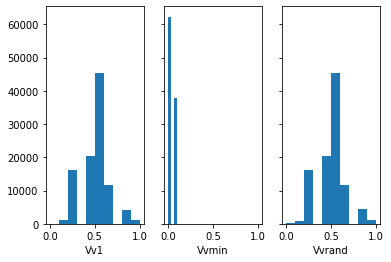

In [13]:
Vv1=[]
Vvrand=[]
Vvmin=[]

for i in range(100000):
  tempV1,tempVrand,tempVmin=flipperFrequency(False,1000,10)
  
  Vv1.append(tempV1)
  Vvrand.append(tempVrand)
  Vvmin.append(tempVmin)

figure, ax = plt.subplots(1, 3, sharey=True, tight_layout=False,sharex=True)
ax[0].hist(Vv1, bins=10)
ax[0].set_xlabel('Vv1')
ax[1].hist(Vvmin, bins=3)
ax[1].set_xlabel('Vvmin')
ax[2].hist(Vvrand,bins=10)
ax[2].set_xlabel('Vvrand')



(c).

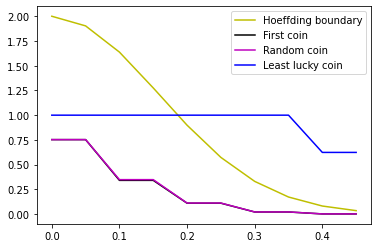

In [11]:
#Hoeffding boundary function
def hoeffding(e,N):
  return 2*np.exp(-2*N*e**2)

e=np.arange(0,0.5,0.05)
C1=np.zeros(len(e))
Crand=np.zeros(len(e))
Cmin=np.zeros(len(e))

for i in range(len(e)):
  C1[i]=np.sum(np.abs(np.array(Vv1)-0.5)>e[i])/100000
  Cmin[i]=np.sum(np.abs(np.array(Vvmin)-0.5)>e[i])/100000
  Crand[i]=np.sum(np.abs(np.array(Vvrand)-0.5)>e[i])/100000

plt.plot(e,hoeffding(e,10),color='y',label='Hoeffding boundary')
plt.plot(e, C1,  color='k',label='First coin')
plt.plot(e, Crand, color='m',label='Random coin')
plt.plot(e, Cmin,  color='b',label='Least lucky coin')
plt.legend()

(d). Como se puede ver en la gráfica y también según la lógica, de las tres monedas solo la moneda $c_{mín}$ no corresponderá a tener como cota a la cota de Hoeffding, pues de las tres monedas es la única que se escoge una vez ya se han procesado los datos.

(e). Se podría pensar que si uno escoge la moneda con menor frecuencia es análogo a escoger la mejor hipótesis de las $h_j$ de la figura 1.10, no obstante esto no lo podemos hacer por lo mismo que acabamos de explicar en el punto $(d).$ y como la cota de Hoeffding no aplica para el punto entonces simplemente no se puede comparar.

1.11

(a). La respuesta corta es que no. Esto debido al uso de la palabra "garantiza", pues nuestro algoritmo $S$ aunque esté funcionando muy bien en una muestra $D$, puede darse que por fuera del conjunto de muestra no coincida con nada. Es decir, si nuestro algoritmo escoge la hipótesis $h_2$, y preciso coincide con que un rendimiento muy bajo por fuera de la muestra $D$, entonces en dado caso, un algoritmo aleatorio, tendría cerca de $\frac{1}{2}$ de probabilidad de atinarle en el rendimiento, que puede darse, sea mejor que el rendimiento de $S$.

(b). Sí, también, en dado caso sabemos que el algoritmo $S$ escogió la hipótesis $h_1$, por tanto el algoritmo $C$ obtuvo la hipótesis $h_2$, puede ocurrir que para todos los $y_n=+1$ de $D$, pero para todos los $y_n=-1$ que no pertenecen a $D$, en dado caso, el rendimiento del algoritmo $C$ sería mucho mejor al del $S$.

(c). Si $p=0.9$, entonces también tenemos que $\mathbb{P}[f(x)=-1]=0.1$. Por lo tanto sabemos que el algoritmo $S$ será 9 veces más probable de producir una hipótesis correcta que el algoritmo $C$.

(d). En caso de que nuestro $p$ sea menor que $0.5$, ocurrirá que el algoritmo $C$ tiene mayor probabilidad de tener un mejor rendimiento que el algoritmo $S$.

Punto XOR

Considerando que dentro de las neuronas de McCulloch-Pitts, las neuronas con el valor de $0$ representan un $NOT$, las que tienen el valor de $1$ representan el $OR$, y aquellas que tienen el $2$ representan un $AND$, podemos entonces representar al $XOR$ utilizando la siguiente red de neuronas: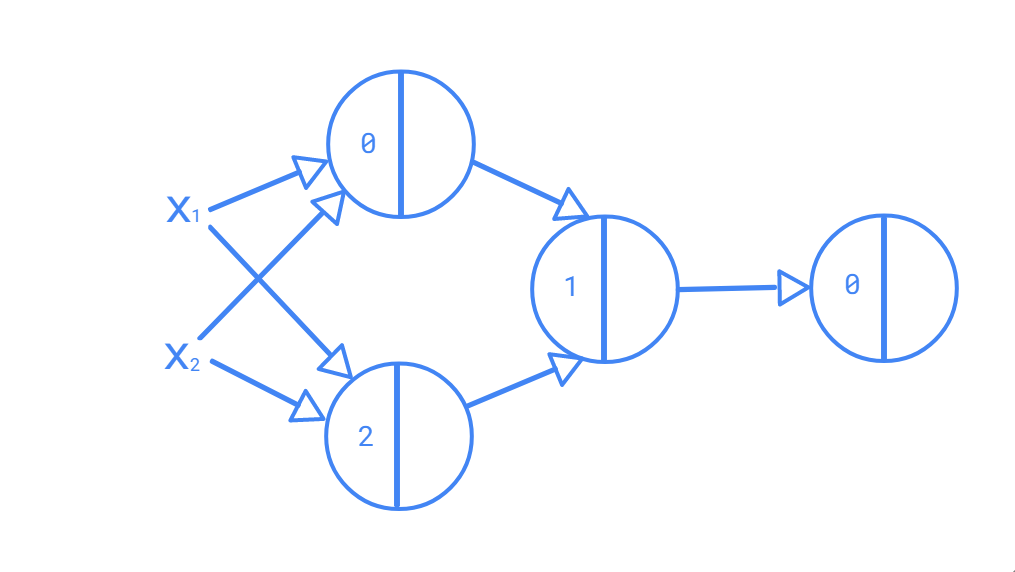

Punto $\frac{\left\lVert \theta^*\right\rVert^2}{\gamma^2}$

En clase habíamos obtenido que $\cos (\theta^*,\theta^{(k)})\geq \dfrac{k\gamma}{\sqrt{kR^2}\left\lVert \theta^*\right\rVert}$, y es fácil ver que $$1\geq \dfrac{{\theta^*}^T\theta^{(k)}}{\left\lVert \theta^*\right\rVert\left\lVert \theta^{(k)}\right\rVert}=\cos (\theta^*,\theta^{(k)})\geq\dfrac{k\gamma}{\sqrt{kR^2}\left\lVert \theta^*\right\rVert}.$$
Desigualdad de la cual podemos despejar a $k$ elevando ambos extremos al cuadrado, obteniendo así que $$k\leq R^2\frac{\left\lVert \theta^*\right\rVert^2}{\gamma^2},$$
donde $k$ es la cantidad de iteraciones de nuestro algoritmo, $R$ corresponde al radio de la bola, y $\gamma$ es el margen. Esta desigualdad tiene sentido, pues $\dfrac{\left\lVert \theta^*\right\rVert^2}{\gamma^2}$ variará dependiendo del $\gamma$, así, si el gama aumenta, se facilitará la tarea de separar los datos, haciendo que la constante $d\frac{\left\lVert \theta^*\right\rVert^2}{\gamma^2}$ se reduzca, disminuyendo el número de pasos $k$. Esto es, que a fin de cuentas la constante nos está sirviendo para aproximar la complejidad del algoritmo del perceptrón.